In [3]:
import numpy as np
import pandas as pd
import sklearn.cluster as cl
import matplotlib.pyplot as plt
import itertools
from typing import Dict
import data_lib

# Data Lib examples

### data_lib.explore_datasets(datafolder : str = "../Data", verbose=False) -> Dict[str, List[str]]:

This method is to gather all the datasets in the Data folder and ouput them as a list.
The output of the function is not very intersting to the user, it is mostly used internaly
with function calls like `data_lib.load_dataset`.

The only intersting feature, is that with the option `verbose = True` it lists
all available datasets orderd by their folder.

In [4]:
# print available data summary
_ = data_lib.explore_datasets(datafolder="../Data",verbose=True)
print(data_lib.LABELS_LIST)

----------------------------------------------------------------------------------------------
-- The following 4 groups were found
-- They contain 40 datasets
-- The first printed entity is the key to the returned dictionary
-----------------------------------
Group: ../Data/6P-positive-dilution-series-2-labelled/droplet-level-data/RawData
po-di-se-2-A4, files: 13                po-di-se-2-C4, files: 13                po-di-se-2-A1, files: 13
po-di-se-2-B1, files: 13                po-di-se-2-D1, files: 13                po-di-se-2-B4, files: 13
-----------------------------------
Group: ../Data/6P-positive-dilution-series-1-labelled/droplet-level-data/RawData
po-di-se-1-D4, files: 13                po-di-se-1-A4, files: 13                po-di-se-1-A1, files: 13
po-di-se-1-D1, files: 13                po-di-se-1-B1, files: 13                po-di-se-1-C1, files: 13
-----------------------------------
Group: ../Data/6P-positive-dilution-series-labelled/droplet-level-data/RawData
po-di

### data_lib.load_dataset(labels : List[str] = None, datasets : List[str] = None, datafolder : str = "../Data") -> pd.DataFrame:

This function probably the most usefull, as it allows to create custom combinations of datasets and labels in ONE dataframe.

The first parameter takes a list of desired labels to be collected. For each of the indicated labels, one columns with the one-hot-encodings
will be added.

The next parameter is a list of datasets to be merged into one single dataset. The entries of the indicated sets are combined in the order given
along the rows, i.e. there will be much more rows in the output dataset than in the individual datasets.


In [7]:
# load a single dataset without labels
df = data_lib.load_dataset([], ["po-di-se-2-A4"], "../Data")
print(f"shape: {df.shape}")
print(f"head {df.head()}")

shape: (24044, 6)
head    Chan1_FluoValue  Chan2_FluoValue  Chan3_FluoValue  Chan4_FluoValue  \
0             5012             7032             5329             4326   
1             5091            10959            15297            13063   
2             5056             6453             5914            11799   
3            12156            13688             5830            10977   
4             4774             6879             5458             4487   

   Chan5_FluoValue  Chan6_FluoValue  
0             2774             9374  
1            17206            19029  
2             2319             8796  
3             2754             9151  
4             2756             8994  


In [11]:
# load three datasets with two labels
df = data_lib.load_dataset(["IAV-M_POS", "SARS-N1_POS"], ["po-di-se-2-A4", "po-di-se-2-A1"], "../Data")
print(f"shape: {df.shape}")
print(f"head {df.head()}")

shape: (50755, 8)
head    Chan1_FluoValue  Chan2_FluoValue  Chan3_FluoValue  Chan4_FluoValue  \
0             5012             7032             5329             4326   
1             5091            10959            15297            13063   
2             5056             6453             5914            11799   
3            12156            13688             5830            10977   
4             4774             6879             5458             4487   

   Chan5_FluoValue  Chan6_FluoValue  IAV-M_POS  SARS-N1_POS  
0             2774             9374          0            0  
1            17206            19029          1            0  
2             2319             8796          0            0  
3             2754             9151          0            0  
4             2756             8994          0            0  


In [12]:
# load three datasets with all POSITIVE labels
df = data_lib.load_dataset(None, ["po-di-se-2-A4", "po-di-se-2-A1"], "../Data")
print(f"shape: {df.shape}")
print(f"head {df.head()}")

shape: (50755, 12)
head    Chan1_FluoValue  Chan2_FluoValue  Chan3_FluoValue  Chan4_FluoValue  \
0             5012             7032             5329             4326   
1             5091            10959            15297            13063   
2             5056             6453             5914            11799   
3            12156            13688             5830            10977   
4             4774             6879             5458             4487   

   Chan5_FluoValue  Chan6_FluoValue  IAV-M_POS  IBV-M_POS  MHV_POS  RSV-N_POS  \
0             2774             9374          0          0        0          0   
1            17206            19029          1          1        0          1   
2             2319             8796          0          0        0          1   
3             2754             9151          0          0        0          1   
4             2756             8994          0          0        0          0   

   SARS-N1_POS  SARS-N2_POS  
0            0      

In [13]:
# load all available data
df = data_lib.load_dataset(datafolder="../Data")
print(f"shape: {df.shape}")
print(f"head {df.head()}")

shape: (916501, 12)
head    Chan1_FluoValue  Chan2_FluoValue  Chan3_FluoValue  Chan4_FluoValue  \
0             5012             7032             5329             4326   
1             5091            10959            15297            13063   
2             5056             6453             5914            11799   
3            12156            13688             5830            10977   
4             4774             6879             5458             4487   

   Chan5_FluoValue  Chan6_FluoValue  IAV-M_POS  IBV-M_POS  MHV_POS  RSV-N_POS  \
0             2774             9374          0          0        0          0   
1            17206            19029          1          1        0          1   
2             2319             8796          0          0        0          1   
3             2754             9151          0          0        0          1   
4             2756             8994          0          0        0          0   

   SARS-N1_POS  SARS-N2_POS  
0            0     

### data_lib.pairwise_plots(label : str, data_sets : List[str], classifier : skl.base.ClusterMixin, data_folder : str = "../Data", verbose : bool = False):

This function generates clusters and compares them with the labels. 

The function takes the desired label to be compared as a first input

Then a list of datasets to generate the datasets on which to do the classification.

Next it needs a classifier, which is just an object instance of a class with the `fit_predict` function.

If `verbose = True`, the output will then be a list of clusters generated, 
and the association with the "best" label and their accuracies.
The plot will in any case contain all datapoints, with a different 
**Marker** per **Cluster** and **Color** for **Labels** whereas 
red labels are falsely classified point (indicating too little clusters).

Cluster  0, num points    18537, POS labelled      0,     0.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  1, num points      293, POS labelled      0,     0.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  2, num points       21, POS labelled      0,     0.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  3, num points       54, POS labelled     54,   100.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  4, num points       22, POS labelled     22,   100.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  5, num points     2388, POS labelled      0,     0.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  6, num points      130, POS labelled    130,   100.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  7, num points     2507, POS labelled      0,     0.0%, for SARS-N2_POS, on ['wa-sa-A3', 'po-di-se-2-A1'].
Cluster  8, num points    10680, POS labelled      0,     0.0%, for SARS-N2_POS,

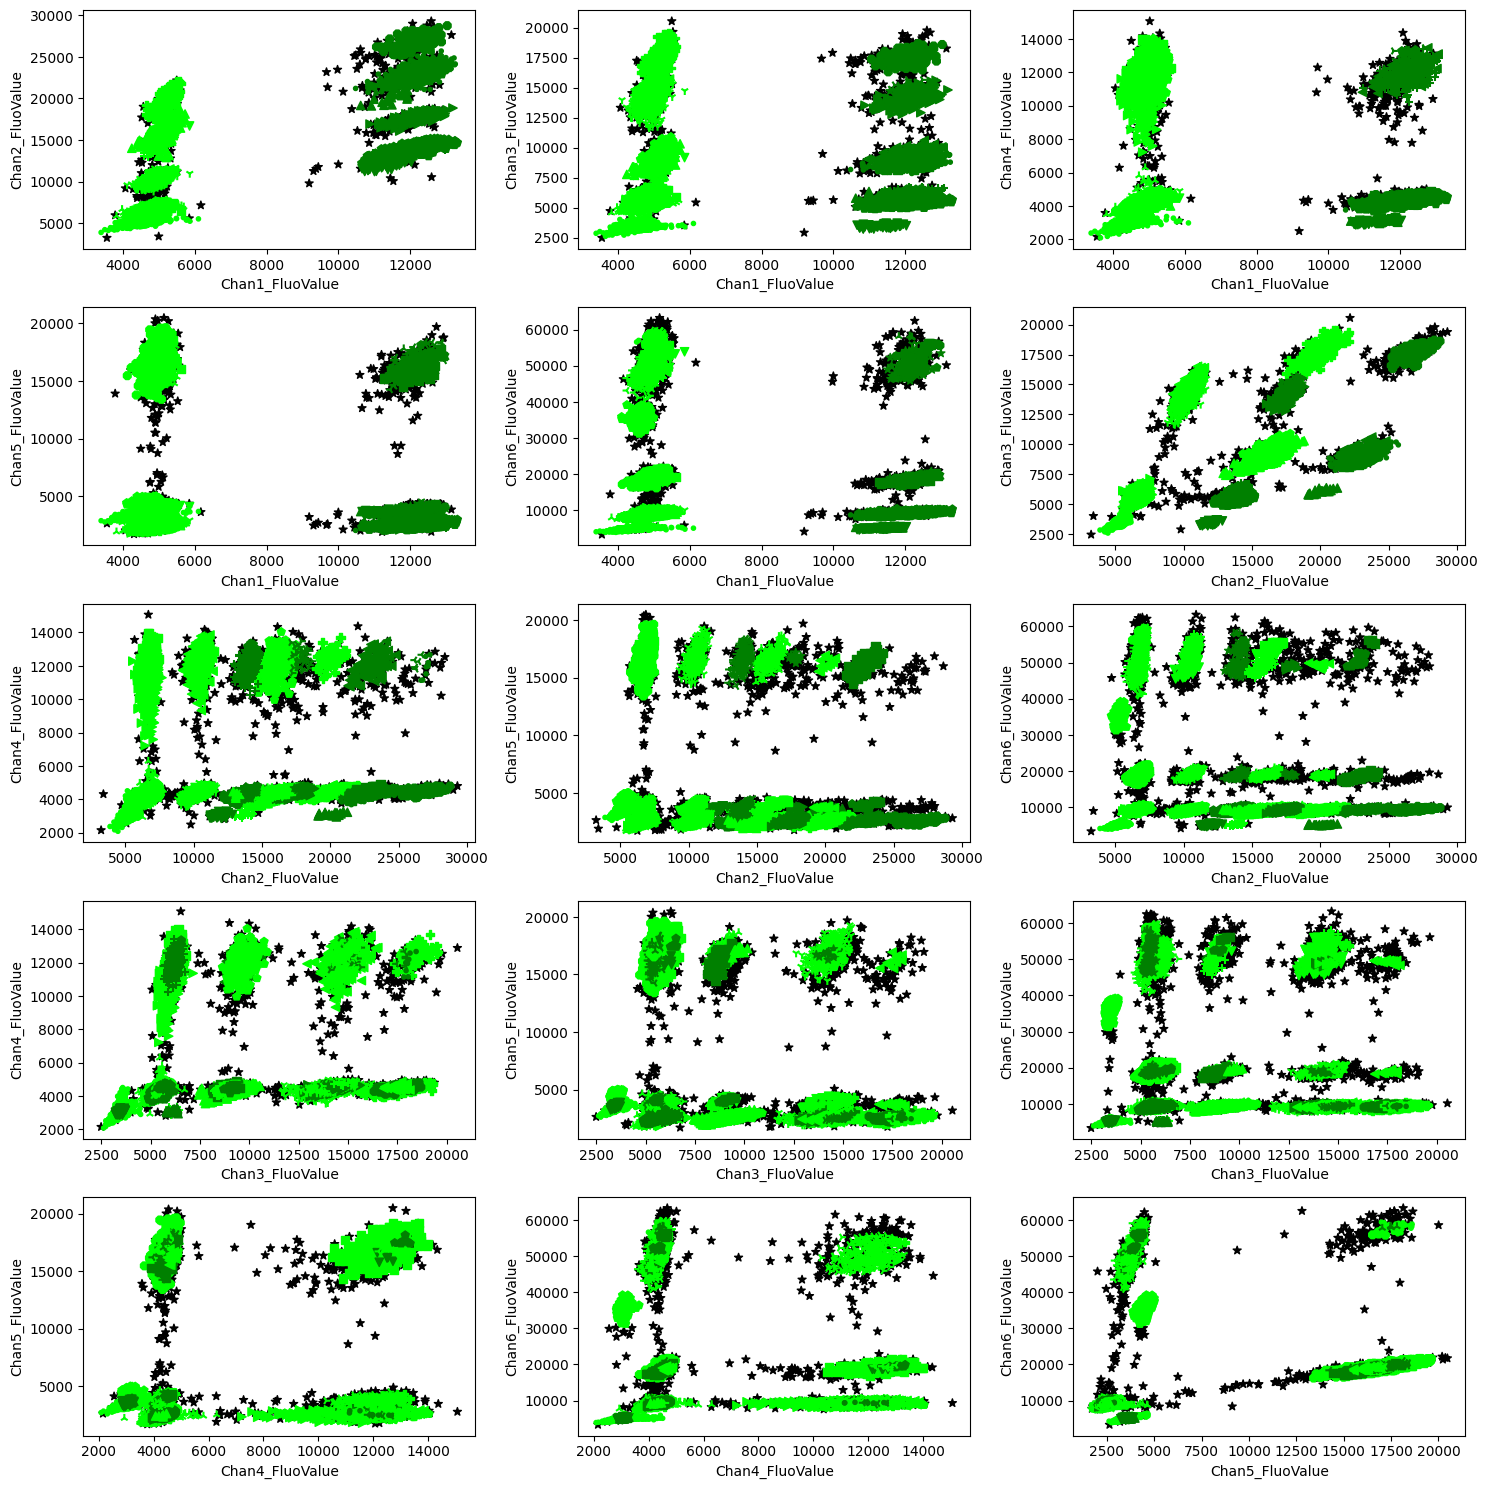

In [17]:
# DBSCAN on two combined datasets
classifier = cl.DBSCAN(eps = 700, min_samples = 5)
df = data_lib.pairwise_plots("SARS-N2_POS", ["wa-sa-A3", "po-di-se-2-A1"], classifier, "../Data", verbose=True)